# Unupervised Learning with toybrains dataset using Scikit-learn

> Author(s): JiHoon Kim<br>
> Date: 06 June 2023<br>

## Installing Libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages

import matplotlib.pyplot as plt

In [3]:
# add custom imports
# (TODO) refactoring needed

from utils.dataset import generate_dataset
from utils.sklearn import get_reduc_loader, run_logistic_regression

## Generating the synthetic dataset

In [4]:
# ! python create_toybrains.py -d -n 10000

## Loading the Dataset

Set dataset Config

In [5]:
# set random seed

seed = 42

# set raw csv path

raw_csv_path = '/ritter/share/projects/JiHoon/toybrains/toybrains/toybrains_n10000.csv'

# set target label

label = 'lblbin_bvol-vthick'

Load dataset (same generator from lightning)

In [6]:
# split the dataset for training, validation, and test from raw dataset

dataset = generate_dataset(raw_csv_path, label, seed)

Set model config

In [7]:
# set dimensionality reduction method

method = 'PCA' # PCA, MDS, ICA # (TODO) ICA, tSNE, LDA

# set n_components

n_components = 100

Run dimensionality reduction

In [8]:
# conduct dimensionality reduction

data = get_reduc_loader(dataset = dataset, method = method, n_components=n_components, seed = seed)

Run logistic regression

In [9]:
# run logistic regression

run_logistic_regression(data)

Train Accuracy:   0.5484 Validation Accuracy:   0.5110 Test Accuracy:   0.4920


(0.548375, 0.511, 0.492)

Example

`Labels : 'lblbin_stop-smidl-bvol', 'lblbin_stop-smidl-vthick', 'lblbin_bvol-vthick'`


#################### lblbin_stop-smidl-bvol in PCA ####################
N = 3
Train Accuracy:   0.5031 Validation Accuracy:   0.5010 Test Accuracy:   0.5020
N = 10
Train Accuracy:   0.5164 Validation Accuracy:   0.5170 Test Accuracy:   0.5040
N = 25
Train Accuracy:   0.5232 Validation Accuracy:   0.5070 Test Accuracy:   0.4800
N = 50
Train Accuracy:   0.5295 Validation Accuracy:   0.5070 Test Accuracy:   0.5000
N = 250
Train Accuracy:   0.5689 Validation Accuracy:   0.5140 Test Accuracy:   0.4850
N = 500
Train Accuracy:   0.5992 Validation Accuracy:   0.5400 Test Accuracy:   0.4910
N = 1000
Train Accuracy:   0.6404 Validation Accuracy:   0.5200 Test Accuracy:   0.4870


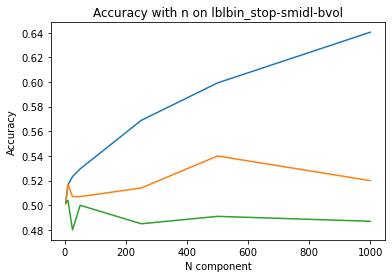


#################### lblbin_stop-smidl-vthick in PCA ####################
N = 3
Train Accuracy:   0.5166 Validation Accuracy:   0.5050 Test Accuracy:   0.5150
N = 10
Train Accuracy:   0.5154 Validation Accuracy:   0.4890 Test Accuracy:   0.5160
N = 25
Train Accuracy:   0.5240 Validation Accuracy:   0.4870 Test Accuracy:   0.5280
N = 50
Train Accuracy:   0.5289 Validation Accuracy:   0.4890 Test Accuracy:   0.5190
N = 250
Train Accuracy:   0.5731 Validation Accuracy:   0.4910 Test Accuracy:   0.5260
N = 500
Train Accuracy:   0.5999 Validation Accuracy:   0.5160 Test Accuracy:   0.5220
N = 1000
Train Accuracy:   0.6441 Validation Accuracy:   0.4750 Test Accuracy:   0.5250


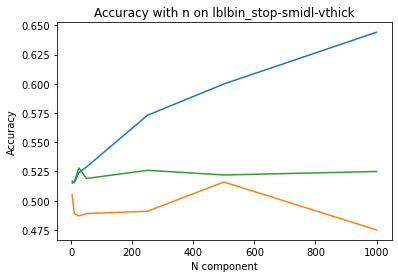


#################### lblbin_bvol-vthick in PCA ####################


In [ ]:
raw_csv_path = '/ritter/share/projects/JiHoon/toybrains/toybrains/toybrains_n10000.csv'
method = 'PCA'
labels = ['lblbin_stop-smidl-bvol', 'lblbin_stop-smidl-vthick', 'lblbin_bvol-vthick']
n_component_list = [3, 10, 25, 50, 250, 500, 1000]
seed = 42

for label in labels:
    print(f"\n{'#'*20} {label} in {method} {'#'*20}")
    
    dataset = generate_dataset(raw_csv_path, label, seed)
    
    n_list, tr_acc, vl_acc, te_acc = [], [], [], []

    for n_components in n_component_list:
        data = get_reduc_loader(dataset = dataset, method = method, n_components=n_components, seed = seed)
        
        # run logistic regression
    
        print(f"N = {n_components}")
        acc = run_logistic_regression(data)
        n_list.append(n_components)
        tr_acc.append(acc[0])
        vl_acc.append(acc[1])
        te_acc.append(acc[2])
        
    plt.title(f"Accuracy with n on {label}")
    plt.plot(n_list, tr_acc)
    plt.plot(n_list, vl_acc)
    plt.plot(n_list, te_acc)
    plt.xlabel('N component')
    plt.ylabel('Accuracy')
    plt.show()